# How to use scranpy

## Load a dataset

for the notebook, we will use the zeisel dataset from [here](https://github.com/kanaverse/random-test-files/releases/tag/zeisel-brain-v1.0.0)

In [1]:
import anndata
data = anndata.read_h5ad("./csc.h5ad")
data

AnnData object with n_obs × n_vars = 3005 × 20006
    obs: 'tissue', 'group #', 'total mRNA mol', 'well', 'sex', 'age', 'diameter', 'cell_id', 'level1class', 'level2class'
    var: 'featureType'
    uns: 'X_name'

In [2]:
matrix = data.X.T
features = data.var.index.tolist()

## Run the analysis

In [3]:
import scranpy
results = scranpy.analyze(matrix, features)
results

AnalyzeResults(rna_quality_control_subsets={'mito': [19972, 19973, 19974, 19975, 19976, 19977, 19978, 19979, 19980, 19981, 19982, 19983, 19984, 19985, 19986, 19987, 19988, 19989, 19990, 19991, 19992, 19993, 19994, 19995, 19996, 19997, 19998, 19999, 20000, 20001, 20002, 20003, 20004, 20005]}, rna_quality_control_metrics=<biocframe.BiocFrame.BiocFrame object at 0x12e903430>, rna_quality_control_thresholds=<biocframe.BiocFrame.BiocFrame object at 0x12e9034f0>, rna_quality_control_filter=array([False, False, False, ..., False, False, False]), size_factors=array([1.49366258, 1.52807415, 2.17788487, ..., 0.33362518, 0.20707079,
       0.43659262]), gene_variances=<biocframe.BiocFrame.BiocFrame object at 0x13f339b80>, hvgs=array([ True,  True,  True, ...,  True,  True,  True]), pca=PcaResult(principal_components=array([[ 19.98708869,  -2.15910516, -14.52742182, ...,   2.36856474,
         -4.34599333,   3.36717005],
       [ 19.59107969,  -3.37253597, -14.92249854, ...,   1.23545581,
        

In [14]:
result_sce = results.to_sce(matrix)
print(result_sce)

Class SingleCellExperiment with 20006 features and 3002 cells 
  main_experiment_name: None 
  assays: ['counts', 'logcounts'] 
  features: [] 
  cell annotations: [] 
  reduced dimensions: None 
  alternative experiments: None


## Plot the results

In [5]:
import biocborn as bb
import numpy as np

### Embeddings

In [6]:
results.tsne

TsneEmbedding(x=array([21.69524392, 21.20602903, 22.39840999, ..., 16.48615352,
       12.82848349, 20.64714035]), y=array([-17.85912124, -17.58016279, -17.23219384, ...,  -1.64163429,
         1.58260204,   3.13219233]))

In [7]:
tsne_ndarray = np.column_stack((results.tsne.x, results.tsne.y))
tsne_ndarray

array([[ 21.69524392, -17.85912124],
       [ 21.20602903, -17.58016279],
       [ 22.39840999, -17.23219384],
       ...,
       [ 16.48615352,  -1.64163429],
       [ 12.82848349,   1.58260204],
       [ 20.64714035,   3.13219233]])

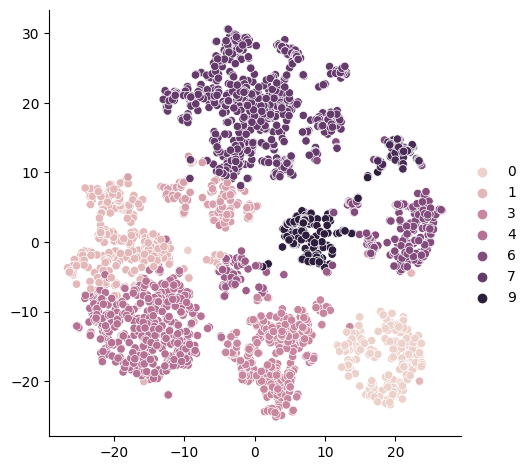

In [8]:
bb.plot_reduced_dim(tsne_ndarray, color_by=results.clusters)

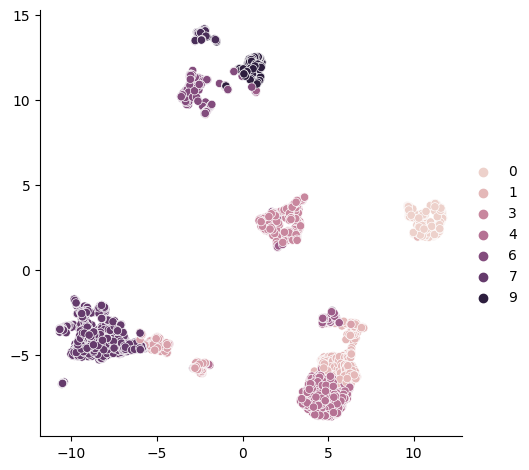

In [12]:
umap_ndarray = np.column_stack((results.umap.x, results.umap.y))
bb.plot_reduced_dim(umap_ndarray, color_by=results.clusters)

In [10]:
### Overlay the expression of a gene

In [ ]:
# matrix[0,:].toarray()[0].tolist()
result_sce.assays["logcounts"]

In [ ]:
bb.plot_reduced_dim(tsne_ndarray, color_by = result_sce)